In [8]:
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter

In [2]:
run_path = '../'
test_name = 'Kovasznay'

test_path = os.path.join(run_path, test_name)

In [3]:
late_stage = 8000

In [4]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
runs

['CKAN_d16_k1',
 'CKAN_d16_k2',
 'CKAN_d32_k1',
 'CKAN_d32_k2',
 'CKAN_d8_k1',
 'CKAN_d8_k2',
 'FCN_[16, 16]',
 'FCN_[16]',
 'FCN_[32, 32]',
 'FCN_[32]',
 'FCN_[8, 8]',
 'FCN_[8]',
 'LKAN_d16',
 'LKAN_d32',
 'LKAN_d8',
 'StackedCKAN_deg[10, 4]_h[4]',
 'StackedCKAN_deg[2, 4]_h[4]',
 'StackedCKAN_deg[20, 4]_h[4]',
 'StackedCKAN_deg[4, 10]_h[4]',
 'StackedCKAN_deg[4, 20]_h[4]',
 'StackedCKAN_deg[4, 2]_h[4]',
 'StackedCKAN_deg[4, 4, 4, 4, 4]_h[4, 4, 4, 4]',
 'StackedCKAN_deg[4, 4, 4, 4]_h[4, 4, 4]',
 'StackedCKAN_deg[4, 4, 4]_h[4, 4]',
 'StackedCKAN_deg[4, 4]_h[10]',
 'StackedCKAN_deg[4, 4]_h[2]',
 'StackedCKAN_deg[4, 4]_h[4]',
 'StackedCKAN_deg[4, 4]_h[6]',
 'StackedCKAN_deg[4, 4]_h[8]',
 'StackedCKAN_deg[4, 8]_h[4]',
 'StackedCKAN_deg[8, 4]_h[4]']

In [5]:
analyser = RunAnalyser(runs, test_path)

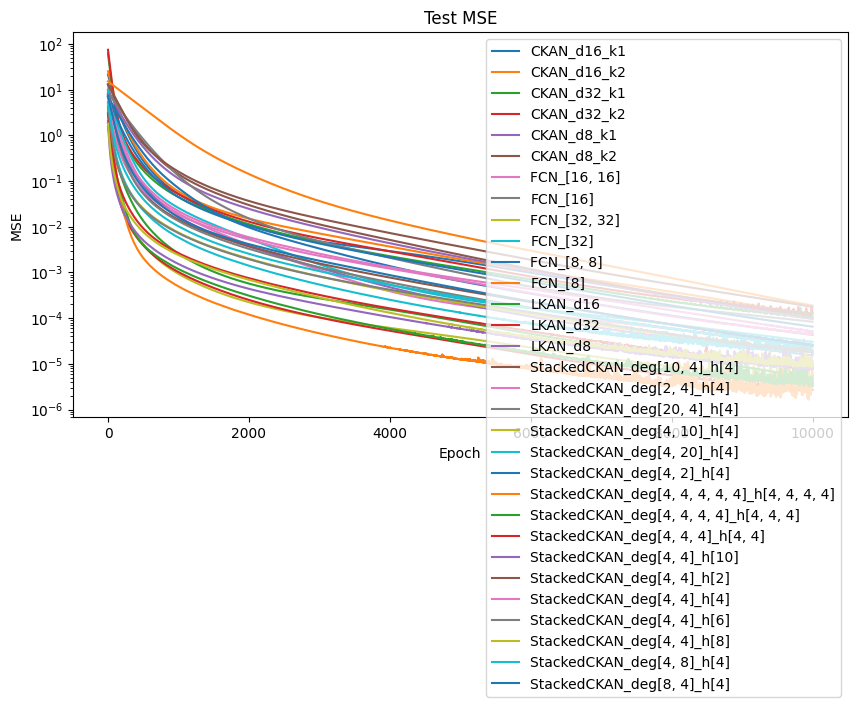

In [6]:
# Plot all models
analyser.plot_mses()

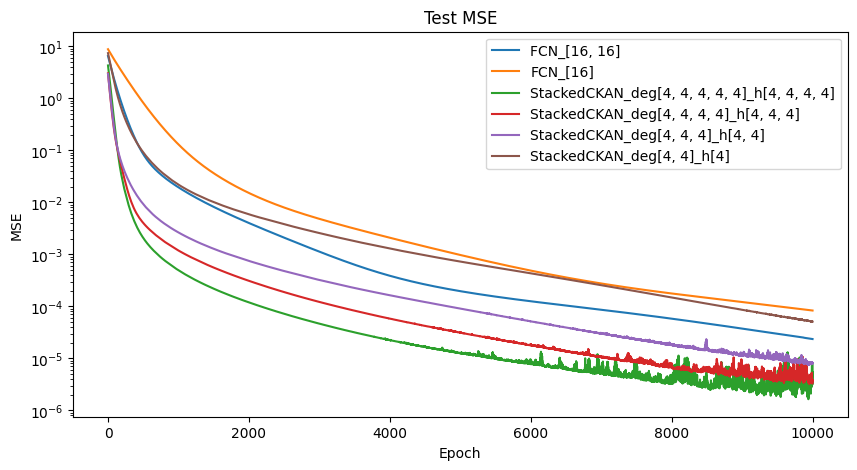

In [14]:
analyser.plot_mses(filter=lambda x: re.match('StackedCKAN_deg[4[, 4]*]_h[4[, 4]*]', x) or 'FCN_[16' in x)

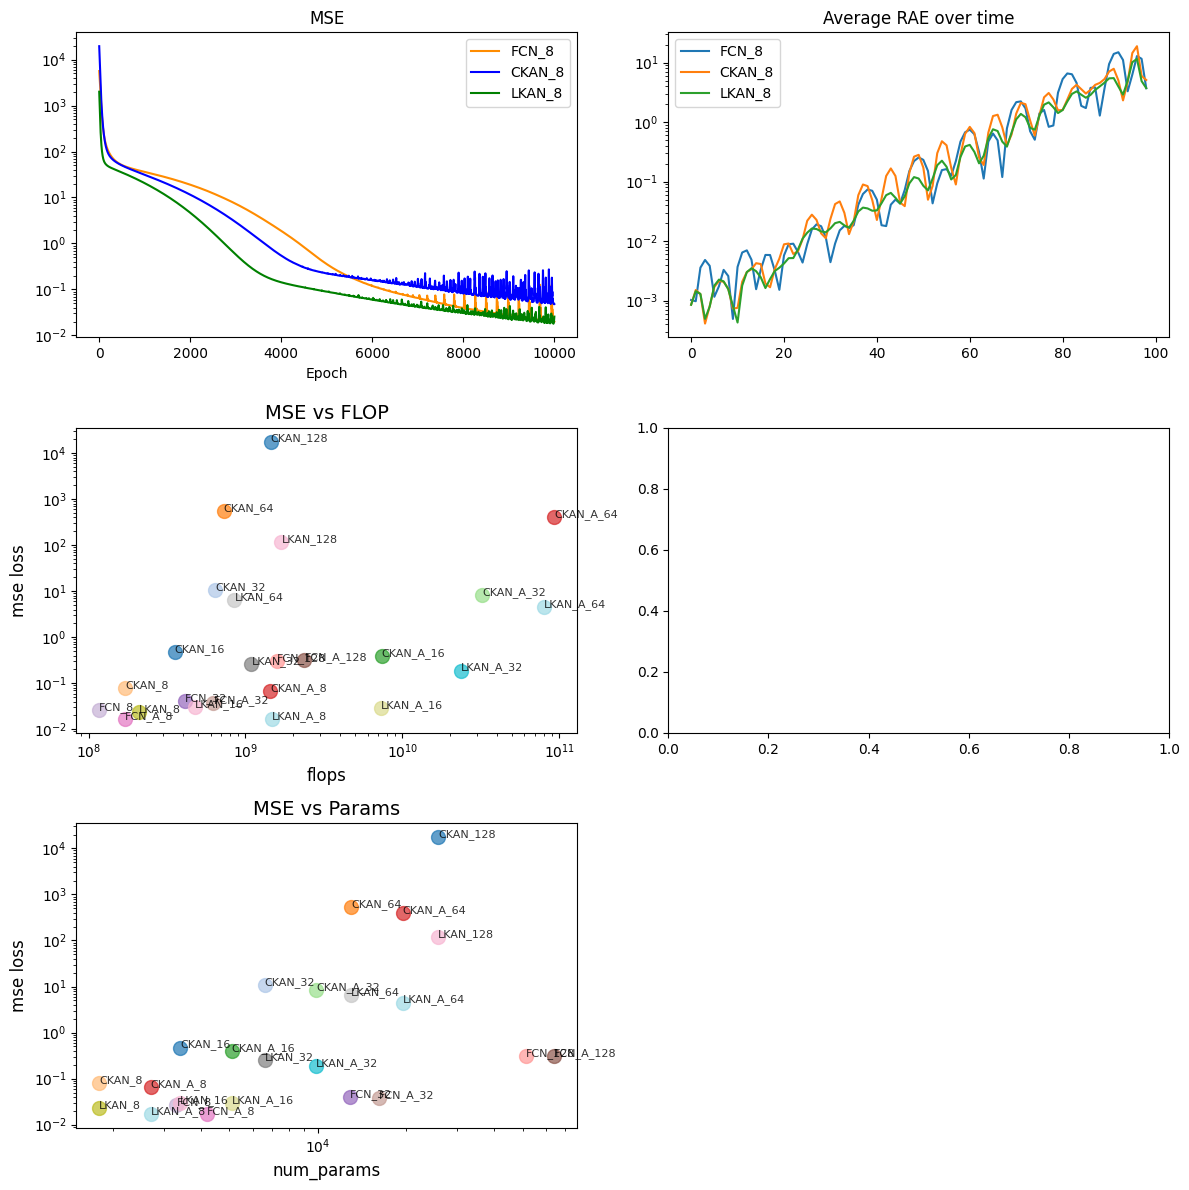

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(3,2,1)
plt.semilogy(analyser.mses['FCN_8'], label='FCN_8', color='darkorange')
plt.semilogy(analyser.mses['CKAN_8'], label='CKAN_8', color='blue')
plt.semilogy(analyser.mses['LKAN_8'], label='LKAN_8', color='green')
plt.title('MSE')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(3,2,3)
analyser.plot_mse_over_flops(noshow=True, legend=False)

plt.subplot(3,2,5)
analyser.plot_mse_over_params(noshow=True, legend=False)

pred_file = f'test_10000.npy'
exact_file = 'test_exact.npy'

def plot_avg_RAE_over_time(model):
    pred = np.load(os.path.join(test_path, model, pred_file)).reshape(100, 100)
    exact = np.load(os.path.join(test_path, model, exact_file)).reshape(100, 100)
    plt.plot(
        np.mean(
            np.abs((pred[1:-1, 1:] - exact[1:-1, 1:])/exact[1:-1, 1:]), axis=0
            ))

plt.subplot(3,2,2)
plot_avg_RAE_over_time('FCN_8')
plot_avg_RAE_over_time('CKAN_8')
plot_avg_RAE_over_time('LKAN_8')
plt.legend(['FCN_8', 'CKAN_8', 'LKAN_8'])
plt.title('Average RAE over time')
plt.yscale('log')

plt.subplot(3,2,4)




plt.tight_layout()
plt.show()